<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/HW0505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 
ch4. 1부터 5 (2 제외)
pg. 183-227 (201-211 제외)


---



#04. 분류

##01. 분류(Classification)의 개요

1. 지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

2. 분류 : 지도학습의 대표적인 유형으로 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

[다양한 머신러닝 알고리즘으로 구현]
* 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
* 데이터 균일도에 따른 규칙 기반의 결정 트리
* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
* 근접거리를 기준으로 하는 최소 근접 알고리즘
* 심층 연결 기반의 신경망
* 서로 다른 (혹은 같은) 머신러닝 알고리즘을 결합한 앙상블

3. 앙상블 : 서로 다른 / 또는 같은 알고리즘을 단순히 결합한 형태도 있으나 일반적으로 배깅, 부스팅으로 나뉨
* 배깅
- 랜덤 포레스트 : 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성
* 앙상블
- 그래디언트 부스팅 : 뛰어난 예측 성능을 가지지만 수행 시간이 너무 오래 걸림
- XGBoost : 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘

##02. 결정 트리

결정 트리 : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
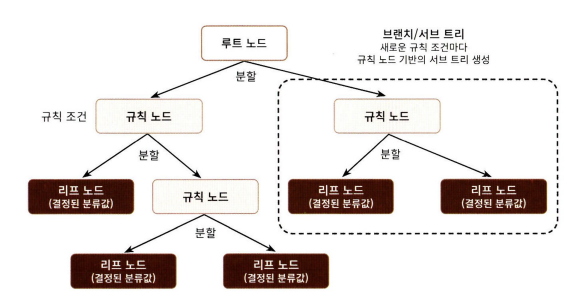

* 규칙 노드 : 규칙 조건이 됨
* 리프 노드 : 결정된 클래스 값
* 서브 트리 : 새로운 규칙 조건마다 생성됨
* 트리가 깊어질수록 과적합 문제가 발생할 가능성이 높아져 예측 성능이 저하될 수 있음
* 가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 함

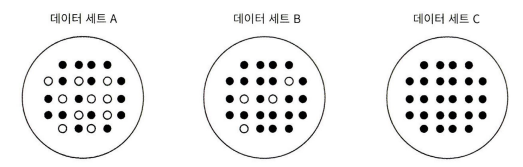

위 사진에서 가장 균일한 데이터 세트 : C->B->A
* 균일도 : 데이터를 구부하는 데 필요한 정보의 양에 영향을 미침
* 결정 노드 : 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측함
* 균일도를 측정하는 방법
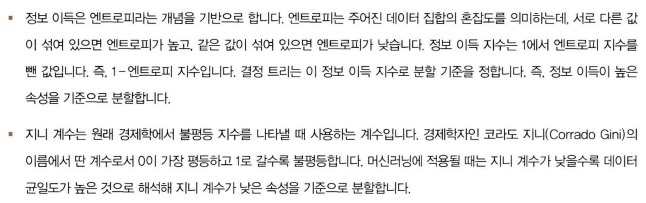

결정 트리의 일반적 알고리즘 :데이터 세트를 분할하는 데 가장 좋은 조건 (정보 이득이 높거나 지니 계수가 낮은 조건)을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정함

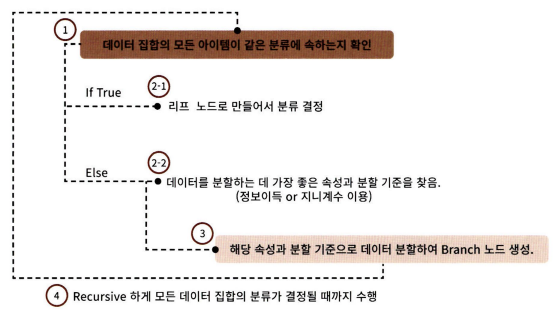

### 결정 트리 모델의 특징
1. 장점
* '균일도'라는 룰을 기반으로 하고 있어 알고리즘의 쉽고 직관적임
* 정보의 균일도만 신경쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
2. 단점
* 과적합으로 정확도가 떨어짐. 피처 정보의 균일도에 따른 불규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해짐 -> 모든 데이터 상황을 만족하는 완벽한 규칙은 만들 수 없다고 인정하는 편이 더 나은 성능을 보장할 수 있음 (트리의 크기를 사전에 제한)

### 결정 트리 파라미터
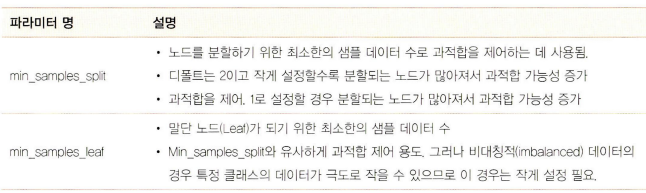
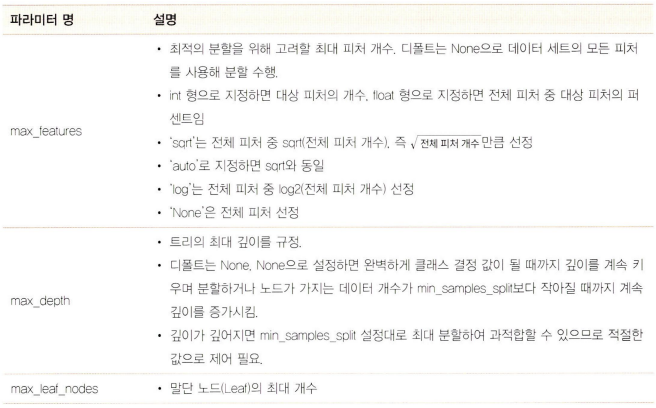

### 결정 트리 모델의 시각화
* Graphviz를 이용함

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [8]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

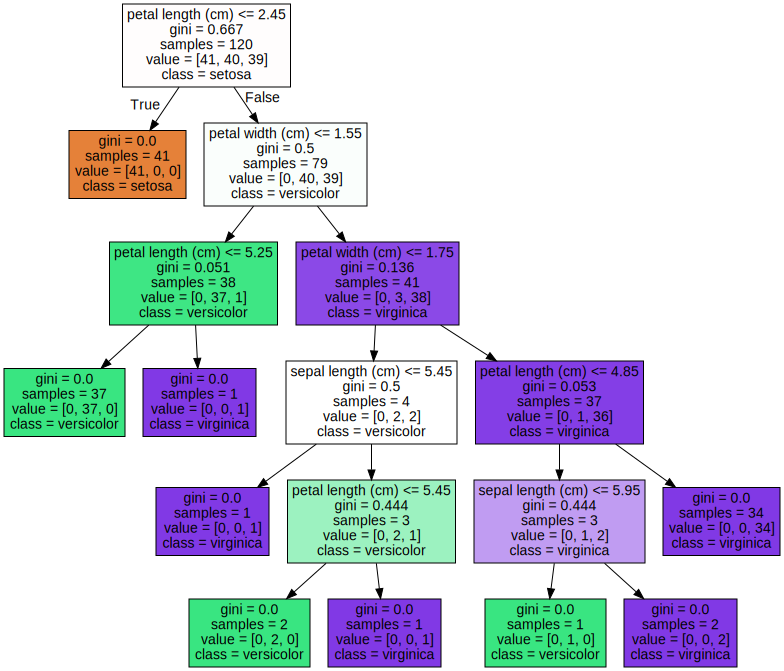

In [9]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

노드 내에 기술된 지표의 의미
* petal Length <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드임
* gini는 다음의 value=()로 주어진 데이터 분포에서의 지니계수임
* samples는 현 규칙에 해당하는 데이터 건수
* value=()는 클래스 값 기반의 데이터 건수임. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며 각각은 setosa, versicolor, virginica 품종을 가리킴

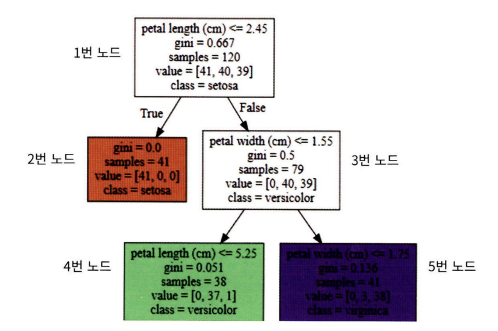

1. 루트 노드 (1번 노드) 지표 설명
* samples = 120 : 전체 데이터는 120개
* value = [41,40,39]는 setosa 41, versicolor 40, virginia 39개의 데이터로 구성되었다는 의미
* 지니 계수는 0.667
* petal length<=2.45 규칙으로 자식 노드 생성
* class = setosa는 하위 노드를 가질 경우 setosa의 개수가 41개로 가장 많다는 의미

2. 2번 노드 : petal length<=2.45가 True인 규칙
* 41개의 샘플 데이터 모두 setosa이므로 예측 클래스는 setosa로 결정
* 지니계수는 0

3. 3번 노드 : petal length<=2.45가 False인 규칙
* 지니 계수가 여전히 0.5로 높으므로 다음 자식 노드로 분분기할 규칙 필요
* petal witdh<=1.55 규칙으로 자식 노드 생성

결정 트리의 max_depth 하이퍼 파라미터 변경에 따른 트리의 변화

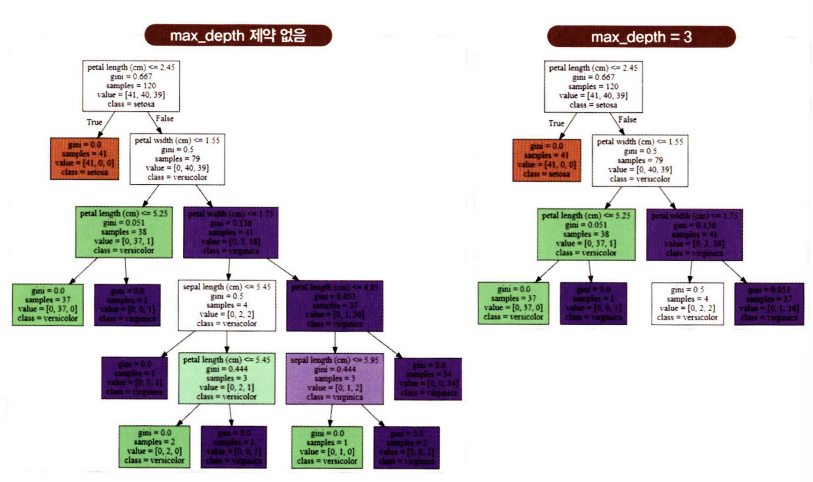

min_sample_split 하이퍼 파라미터 변경에 따른 규칙 트리의 변화

min_sample_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

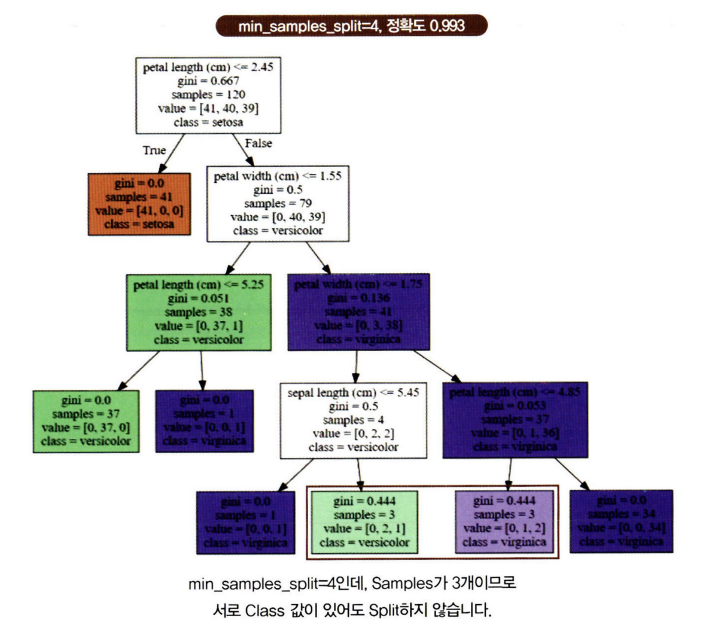

min_samples_leaf 하이퍼 파라미터 변경에 따른 결정 트리의 변화

더 이상 자식 노드가 없는 리프 노드는 클래스 결정 값이 됨. min_samples_leaf는 이 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정함. 디폴트 : 1
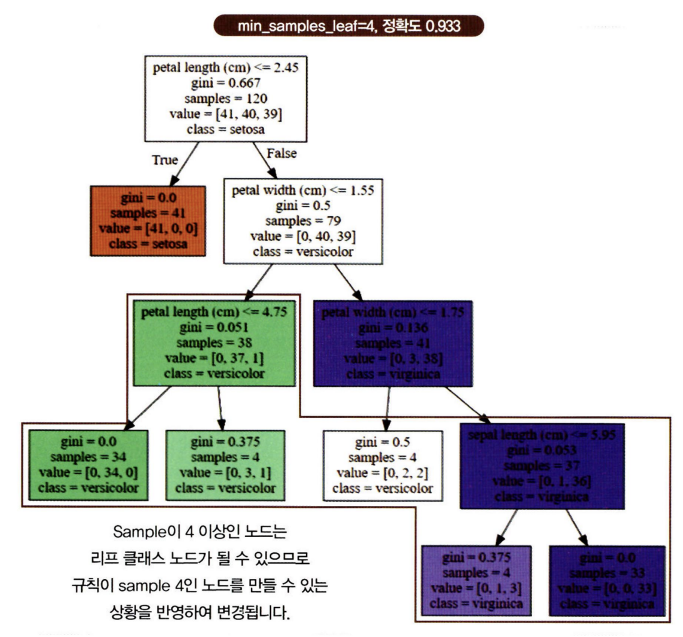

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

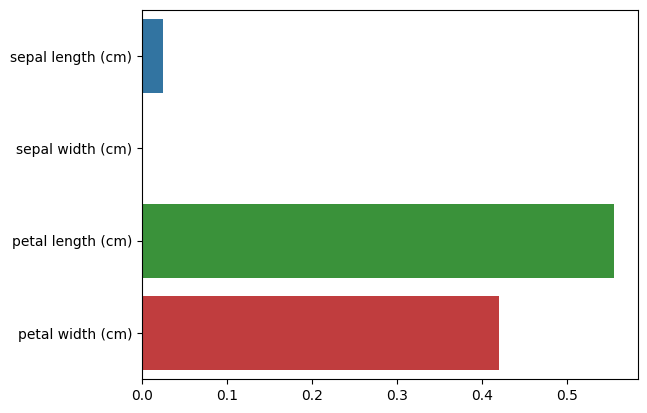

In [10]:
#df_clf에서 feature_importances_ 속성을 가져와 중요도 값을 매핑
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance 를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

petal_length가 가장 피처 중요도가 높음

### 결정 트리 과적합

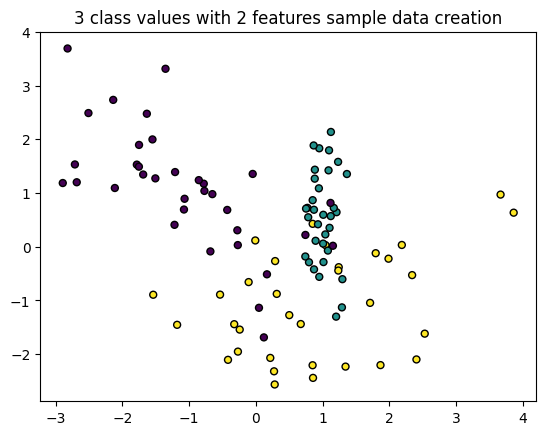

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

#2차원 시각화 위해 피처 2개, 클래스 3개 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, 
                                         n_informative=2, n_classes=3, 
                                         n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, 
            edgecolor='k')

X, Y축으로 나열된 2차원 그래프. 3개의 클래스 값 구분은 색깔로 되어있음

In [12]:
import numpy as np

### Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  fig,ax = plt.subplots()
  
  # 학습 데이터를 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
             clim = (y.min(), y.max()), zorder = 3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
    
  # 호출 파라미터로 들어온 train 데이터로 model 학습
  model.fit(X, y)
  
  # meshgrid 형태인 모든 좌표값으로 예측 수행
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200),
                       np.linspace(ylim_start, ylim_end, num = 200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  
  # contourf()를 이용하여 class boundary를 visualization
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                         levels = np.arange(n_classes + 1) - 0.5,
                         cmap = 'rainbow', clim = (y.min(), y.max()),
                         zorder = 1)

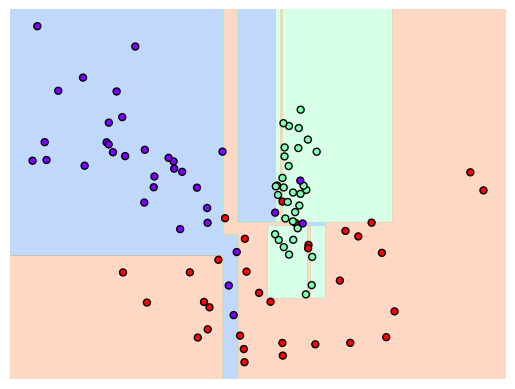

In [13]:
##하이퍼 파라미터가 디폴트인 classifier를 학습하고 결정 기준 경계 시각화
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐 -> 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어짐

In [ ]:
#min_samples_lear=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있음

## 03. 앙상블 학습

### 앙상블 학습 개요
앙상블 학습 : 여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

목표 : 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

유형 : 보팅, 배깅, 부스팅, 스태깅

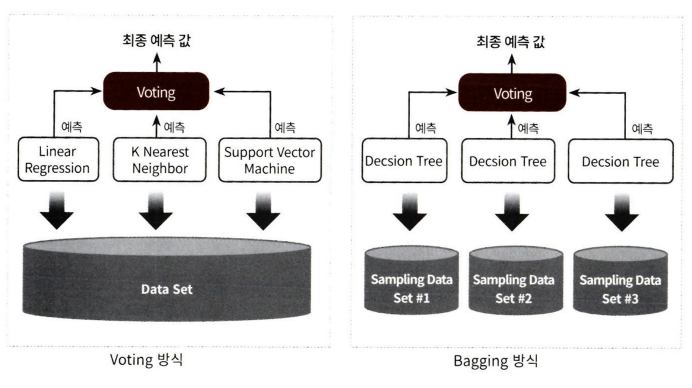

1. 보팅 : 선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅해 최종 예측 결과를 선정

2. 배깅 : 단일 ML 알고리즘으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅과 다름. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 분류기에게 데이터를 샘플링 해서 추출하는 방식을 부트스트래핑 분할 방식이라 함. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식.

* 부스팅 : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치를 부여하면서 학습과 예측을 진행함

### 보팅 유형 - 하드 보팅과 소프트 보팅

* 하드 보팅 : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것
* 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 것

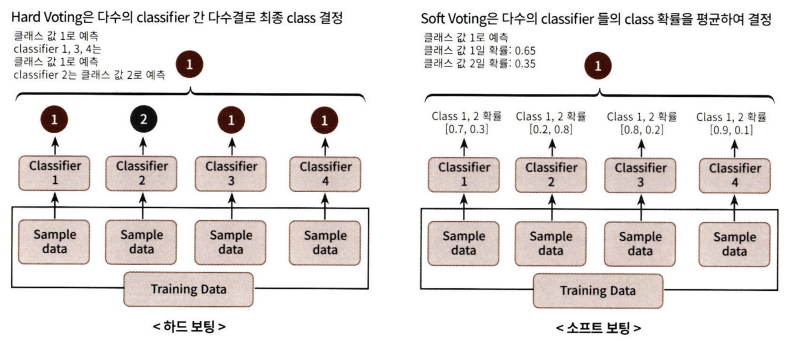

### 보팅 분류기

In [14]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

votingclassifier는 주요 생성 인자로 estimators와 voting 값을 입력 받음. estimators는 리스트 값으로 보팅에 사용될 여러 개의 classifier 객체들은 튜플 형식으로 입력 받으며 voting은 hard시 하드 보팅, soft시 소프트 보팅을 적용하라는 의미임

In [15]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 조금 높게 나타남

## 04. 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습
배깅 : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

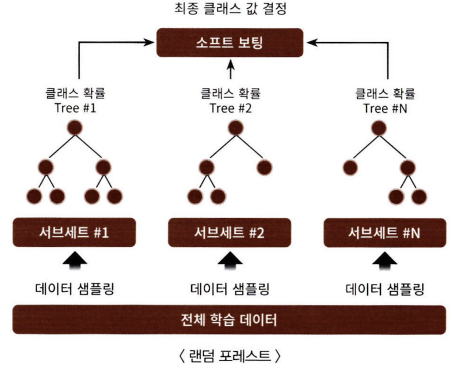

랜덤 포레스트 : 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트

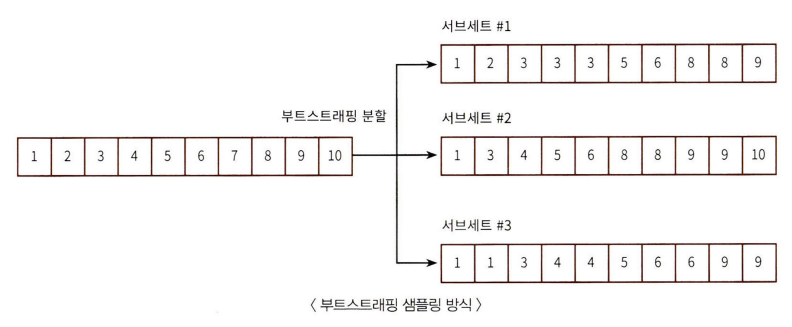

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/학회/데이터/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/학회/데이터/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/학회/데이터/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/학회/데이터/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/학회/데이터/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


랜덤 포레스트는 사용자 행동 인식 데이터 세트에 대해 약 91.08%의 정확도를 보여줌

### 랜덤 포레스트 하이퍼 파라미터 튜닝
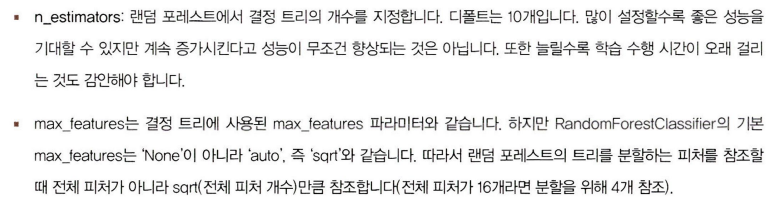
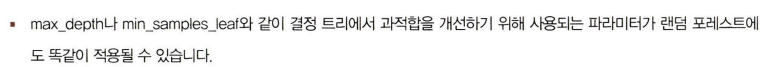

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행 (n_jobs=-1: 모든 CPU 코어를 이용해 학습)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


n_estimator가 100, max_depth : 10, min_samples_leaf:8, min_samples_split:8일 때 약 91.68%의 평균 정확도가 측정됨

In [21]:
# n_estimator를 300으로 증가시키고 다시 학습 시킨 뒤에 별도의 테스트 데이터 세트에서 예측성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치는 약 91.65%

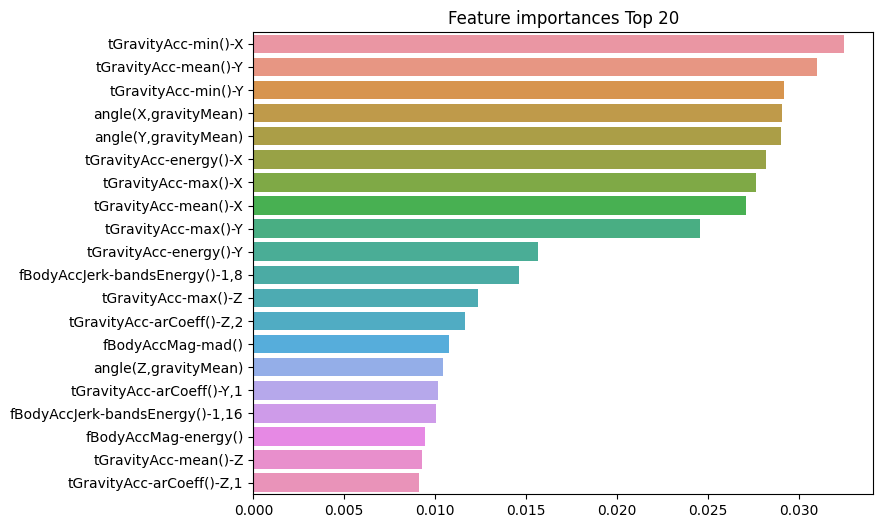

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

##05. GBM (Gradient Boosting Machine)

### GBM의 개요 및 실습
부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해나가면서 학습하는 방식

에이다 부스트 : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

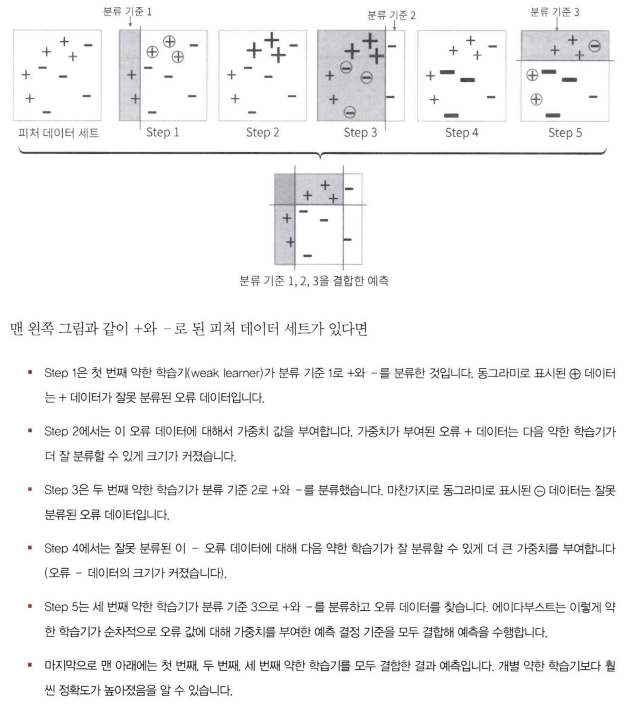

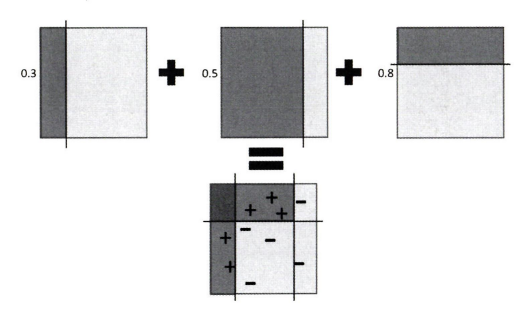

GBM : 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용

경사 하강법 : 반복 수행을 통해 오류를 최소화 할 수 있도록 가중치의 업데이트 값을 도출하는 기법

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 996.4초


기본 하이퍼 파라미터만으로 93.76%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냄. 그렇지 않은 경우도 있겠지만 일반적으로 GBM이 랜덤 포레스트보다는 예측성능이 조금 뛰어난 경우가 많음. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝도 더 노력이 필요함

### GBM 하이퍼 파라미터 튜닝

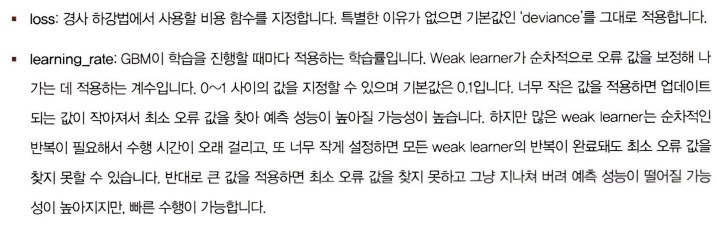

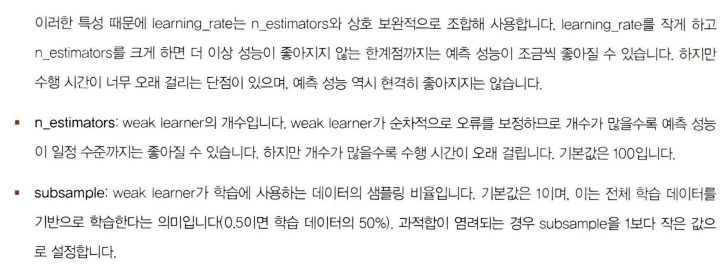

In [ ]:
###
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
###

learning_rate가 0.05, n_estimators가 500일 때 2개의 교차 검증 세트에서 90.1% 정확도가 최고로 도출됨

In [ ]:
###
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
###

테스트 데이터 세트에서 약 94.1%의 정확도. GBM은 과적합에서도 강한 뛰어난 예측 성능을 가진 알고리즘